<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_is_valid_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Given an undirected graph represented as an adjacency matrix and an integer k, write a function to determine whether each vertex in the graph can be colored such that no two adjacent vertices share the same color using at most k colors.


##Solution:
To solve this problem, we can use a backtracking approach to try coloring each vertex with one of the k colors and check if the coloring is valid. A valid coloring means no two adjacent vertices have the same color. Here's how we can implement this:

1. For each vertex, we try to color it with one of the k colors.
2. We check if the color can be assigned to the vertex without causing a conflict (i.e., no adjacent vertex has the same color).
3. If the color can be assigned, we recursively try to color the rest of the graph.
4. If we find a valid coloring for the entire graph, we return `True`.
5. If no valid coloring can be found for a vertex, we backtrack and try a different color.


##Implementation:

Let's implement this in Python:



In [1]:
def is_valid_color(graph, color, vertex, c):
    for i in range(len(graph)):
        if graph[vertex][i] == 1 and color[i] == c:
            return False
    return True

def graph_coloring_util(graph, k, color, vertex):
    if vertex == len(graph):
        return True

    for c in range(1, k + 1):
        if is_valid_color(graph, color, vertex, c):
            color[vertex] = c
            if graph_coloring_util(graph, k, color, vertex + 1):
                return True
            color[vertex] = 0

    return False

def can_color_graph(graph, k):
    color = [0] * len(graph)
    return graph_coloring_util(graph, k, color, 0)


In this code:

- `graph` is the adjacency matrix representation of the graph.
- `k` is the number of colors available.
- `color` is an array where `color[i]` represents the color assigned to vertex `i`.
- `is_valid_color` checks if it's valid to color a vertex with a given color.
- `graph_coloring_util` is the utility function that tries to color the graph recursively.
- `can_color_graph` is the main function that initializes the coloring process.

This function will return `True` if the graph can be colored with `k` colors without any two adjacent vertices having the same color, and `False` otherwise.

##Testing:
To thoroughly test the graph coloring function and ensure it works correctly, we can implement a testing suite using Python's `unittest` framework. We will also use the Model-View-Controller (MVC) paradigm to structure our testing suite.

Here’s how we can structure this:

1. **Model**: Represents the graph and the graph coloring logic.
2. **View**: Handles the graphical output of the graph, showing the vertices, edges, and their colors.
3. **Controller**: Manages the flow of executing tests and interacting with the Model and View.


test_can_color_graph (__main__.TestGraphColoring) ... 

Testing graph coloring with a graph of 4 vertices and 3 colors...
Graph can be colored with 3 colors.
Vertex 0 is colored with color 1
Vertex 1 is colored with color 2
Vertex 2 is colored with color 3
Vertex 3 is colored with color 2


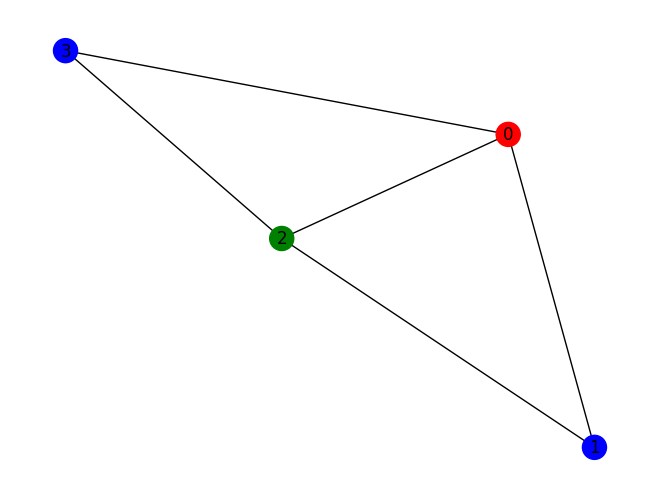

ok

----------------------------------------------------------------------
Ran 1 test in 0.183s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

In [4]:
import unittest
import networkx as nx
import matplotlib.pyplot as plt

# Model: Graph coloring logic
def is_valid_color(graph, color, vertex, c):
    for i in range(len(graph)):
        if graph[vertex][i] == 1 and color[i] == c:
            return False
    return True

def graph_coloring_util(graph, k, color, vertex):
    if vertex == len(graph):
        return True

    for c in range(1, k + 1):
        if is_valid_color(graph, color, vertex, c):
            color[vertex] = c
            if graph_coloring_util(graph, k, color, vertex + 1):
                return True
            color[vertex] = 0

    return False

def can_color_graph(graph, k):
    color = [0] * len(graph)
    return graph_coloring_util(graph, k, color, 0)

# View: Graph visualization
def visualize_graph(graph, color):
    G = nx.Graph()
    G.add_nodes_from(range(len(graph)))
    for i in range(len(graph)):
        for j in range(i + 1, len(graph)):
            if graph[i][j] == 1:
                G.add_edge(i, j)
    color_map = ['red' if color[v] == 1 else 'blue' if color[v] == 2 else 'green' for v in G.nodes()]
    nx.draw(G, with_labels=True, node_color=color_map)
    plt.show()

# Controller: Test suite
class TestGraphColoring(unittest.TestCase):
    def test_can_color_graph(self):
        graph = [
            [0, 1, 1, 1],
            [1, 0, 1, 0],
            [1, 1, 0, 1],
            [1, 0, 1, 0]
        ]
        k = 3
        print("Testing graph coloring with a graph of 4 vertices and 3 colors...")

        result = can_color_graph(graph, k)
        self.assertTrue(result, "Graph should be colorable with 3 colors")

        if result:
            color = [0] * len(graph)
            graph_coloring_util(graph, k, color, 0)
            print(f"Graph can be colored with {k} colors.")
            for vertex in range(len(graph)):
                print(f"Vertex {vertex} is colored with color {color[vertex]}")
            visualize_graph(graph, color)
        else:
            print("Graph cannot be colored with the given number of colors.")

# Manually creating and running the test suite
suite = unittest.TestSuite()
suite.addTest(TestGraphColoring('test_can_color_graph'))

runner = unittest.TextTestRunner(verbosity=2)
runner.run(suite)

In this setup:

- The **model** part consists of the graph coloring functions.
- The **view** part is the `visualize_graph` function, which takes the graph and the coloring result to display the graph with colored vertices.
- The **controller** part is the `TestGraphColoring` class, which manages the execution of tests and communicates with both the model and view to verify the correctness of the graph coloring function and to display the results.

Running the test will execute the graph coloring algorithm and display the graph with colored nodes, helping to visually verify the correctness of the algorithm.

To further test the graph coloring algorithm, we should consider various scenarios and properties of graphs. Here are some additional tests that can be implemented:

1. **Test with different graph sizes**: Small, medium, and large graphs to evaluate the algorithm's performance and correctness across a range of sizes.
2. **Test with various values of k**: Checking the minimum number of colors needed to color the graph, and testing with less than the minimum to expect a failure.
3. **Special graph structures**: Such as testing with complete graphs, cyclic graphs, bipartite graphs, and disconnected graphs to ensure the algorithm handles these cases correctly.
4. **Edge cases**: Graphs with no edges (every vertex is isolated), or a graph with a single vertex.
5. **Graphs that are known to have a specific chromatic number**: Such as a planar graph (which by the Four Color Theorem, should never need more than four colors).

These tests provide a more comprehensive evaluation of the graph coloring algorithm, covering a variety of graph structures and scenarios to ensure the algorithm is robust and works correctly in different conditions.

test_can_color_graph (__main__.TestGraphColoring) ... 

Testing graph coloring with a graph of 4 vertices and 3 colors...
Graph can be colored with 3 colors.
Vertex 0 is colored with color 1
Vertex 1 is colored with color 2
Vertex 2 is colored with color 3
Vertex 3 is colored with color 2


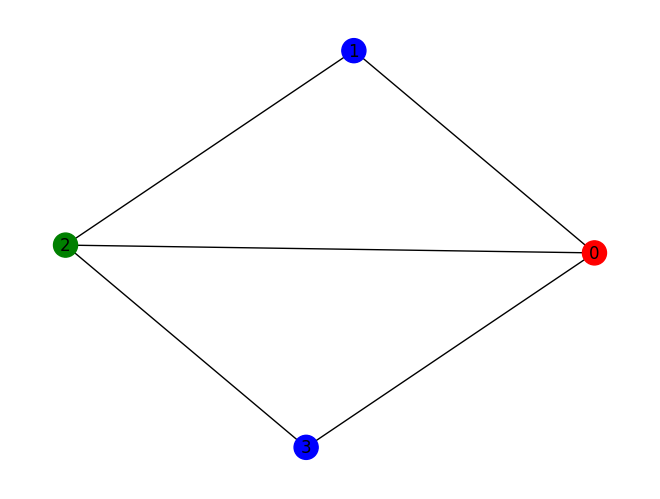

ok
test_bipartite_graph (__main__.TestGraphColoringExtended) ... 

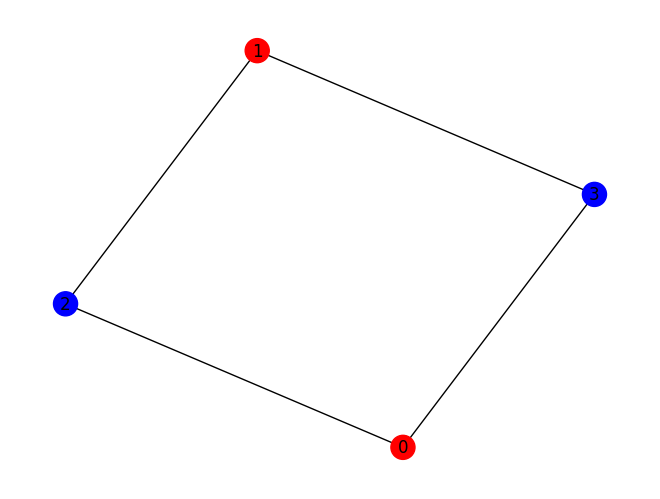

ok
test_complete_graph (__main__.TestGraphColoringExtended) ... 

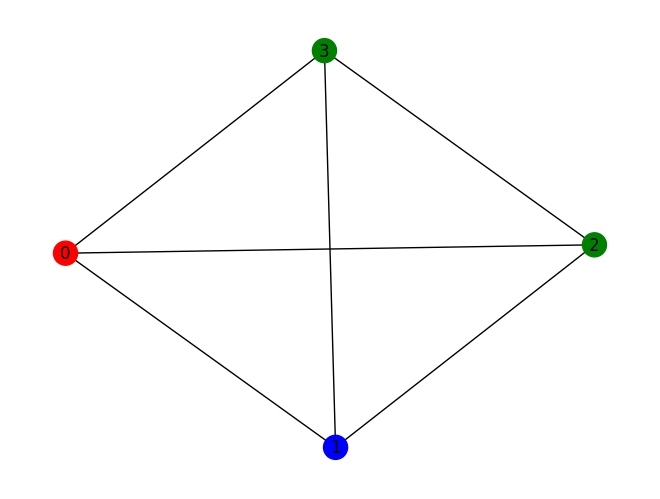

ok
test_disconnected_graph (__main__.TestGraphColoringExtended) ... 

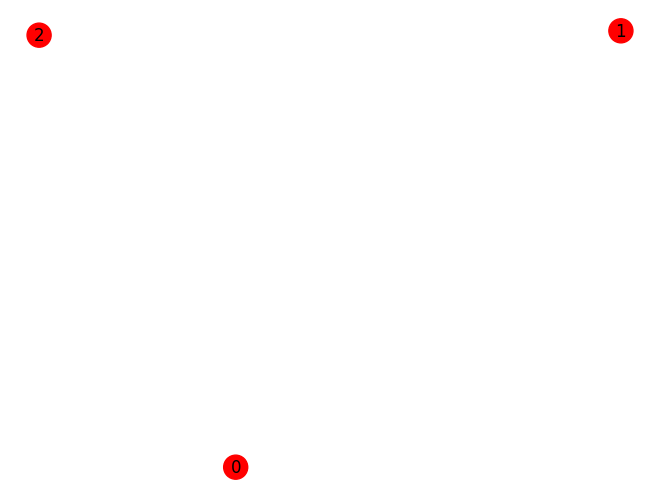

ok
test_insufficient_colors (__main__.TestGraphColoringExtended) ... ok
test_single_vertex (__main__.TestGraphColoringExtended) ... 

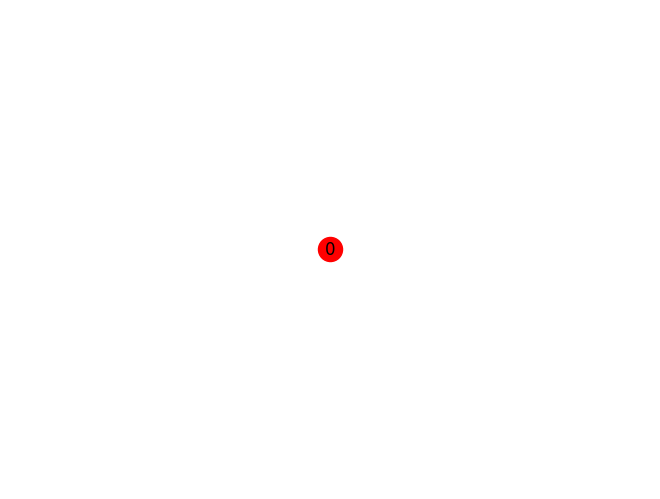

ok

----------------------------------------------------------------------
Ran 6 tests in 0.857s

OK


Finished running tests.
Ran 6 tests: 0 failures, 0 errors.


In [11]:
class TestGraphColoringExtended(unittest.TestCase):
    def test_single_vertex(self):
        graph = [[0]]
        k = 1
        result = can_color_graph(graph, k)
        self.assertTrue(result, "A single vertex should be colorable with one color.")
        if result:
            color = [0] * len(graph)
            graph_coloring_util(graph, k, color, 0)
            visualize_graph(graph, color)

    def test_disconnected_graph(self):
        graph = [
            [0, 0, 0],
            [0, 0, 0],
            [0, 0, 0]
        ]
        k = 1
        result = can_color_graph(graph, k)
        self.assertTrue(result, "A disconnected graph should be colorable with one color.")
        if result:
            color = [0] * len(graph)
            graph_coloring_util(graph, k, color, 0)
            visualize_graph(graph, color)

    def test_complete_graph(self):
        n = 4  # Number of vertices in the complete graph
        graph = [[1 if i != j else 0 for i in range(n)] for j in range(n)]
        k = n
        result = can_color_graph(graph, k)
        self.assertTrue(result, "A complete graph of n vertices should be colorable with n colors.")
        if result:
            color = [0] * len(graph)
            graph_coloring_util(graph, k, color, 0)
            visualize_graph(graph, color)

    def test_bipartite_graph(self):
        graph = [
            [0, 0, 1, 1],
            [0, 0, 1, 1],
            [1, 1, 0, 0],
            [1, 1, 0, 0]
        ]
        k = 2
        result = can_color_graph(graph, k)
        self.assertTrue(result, "A bipartite graph should be colorable with two colors.")
        if result:
            color = [0] * len(graph)
            graph_coloring_util(graph, k, color, 0)
            visualize_graph(graph, color)

    def test_insufficient_colors(self):
        graph = [
            [0, 1, 1],
            [1, 0, 1],
            [1, 1, 0]
        ]
        k = 2
        result = can_color_graph(graph, k)
        self.assertFalse(result, "A triangle graph should not be colorable with less than 3 colors.")
        if result:
            color = [0] * len(graph)
            graph_coloring_util(graph, k, color, 0)
            visualize_graph(graph, color)

if __name__ == '__main__':
    suite1 = unittest.TestLoader().loadTestsFromTestCase(TestGraphColoring)
    suite2 = unittest.TestLoader().loadTestsFromTestCase(TestGraphColoringExtended)

    combined_suite = unittest.TestSuite([suite1, suite2])

    # Explicitly creating a runner and running the tests
    runner = unittest.TextTestRunner(verbosity=2)
    result = runner.run(combined_suite)

    # After running the tests, print a summary
    print("Finished running tests.")
    print("Ran {} tests: {} failures, {} errors.".format(result.testsRun, len(result.failures), len(result.errors)))
